In [132]:
%matplotlib inline
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy.stats as stats

In [216]:
conv =[[1.,0],[0,1.]]
neg_mean =[1.,0]
pos_mean =[0,1.]
data_conv =[[0.2,0],[0,0.2]]

neg_means =np.random.multivariate_normal(neg_mean,conv,10)
pos_means =np.random.multivariate_normal(pos_mean,conv,10)

size =100
data =np.ones((2*size,1),dtype='float')
data =np.concatenate([data,np.zeros((2*size,3))],axis=-1)
print('data shape ',data.shape)
for i in range(size):
    data[i,1:3]=np.random.multivariate_normal(neg_means[np.random.randint(0,10)],data_conv,1)
    data[i,3]=0
    data[100+i,1:3]=np.random.multivariate_normal(pos_means[np.random.randint(0,10)],data_conv,1)
    data[i,3]=1


data shape  (200, 4)


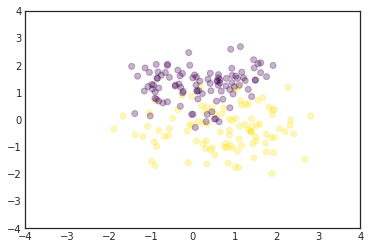

In [217]:

test_x =np.linspace(-4,4,100)
test_y =np.linspace(-4,4,100)
X,Y =np.meshgrid(test_x,test_y)
X=X.reshape(100*100,1)
Y=Y.reshape(100*100,1)
X_test =np.array(list(zip(X,Y)))
X_test =X_train.reshape(10000,2)

#painting curve
plt.xlim(-4,4)
plt.ylim(-4,4)
plt.style.use('seaborn-white')
plt.scatter(data[:,1],data[:,2],c=data[:,3],alpha=0.3,cmap='viridis')

In [201]:
def ols(X,y):
    beta =np.zeros((X.shape[1],1))
    print(beta.shape)
    beta =np.dot(np.linalg.pinv(X),y)
    return beta
beta =ols(data[:,0:3],data[:,3])
print(beta)

def k_nearest_neighbor(X,y,X_test,K):
    x_data =X.copy()
    y_data =y[:,np.newaxis]
    x_data =x_data[:,np.newaxis,:]-X_test[np.newaxis,:,:]
    x_data =x_data**2
    x_data =np.sum(x_data,axis=-1)
    #print(x_data)
    #print('x_data shape ',x_data.shape)
    #print('y_data shape ',y_data.shape)
    nearest_partition =np.argpartition(x_data,K,axis=0)
    #print(nearest_partition)
    nearest_partition =nearest_partition[0:K,:]
    #print(nearest_partition)
    #print('nearset_partitio shape : ',nearest_partition.shape)
    nearest_partition =nearest_partition.T
    #print('nearset_partitio shape : ',nearest_partition.shape)
    y_pred =np.zeros((len(X_test),1),dtype='float')
    for i in range(len(y_pred)):
        y_pred[i,0] =np.mean(y[nearest_partition[i,:]])
    return y_pred

def bayes_classifier(X,y,X_test):
    print('in bayes shape ',X_test.shape)
    mean_pos =np.mean(X[y==1],axis=0)
    mean_neg =np.mean(X[y==0],axis=0)
    conv_pos =np.cov((X[y==1].T))
    conv_neg =np.cov((X[y==0]).T)
    prob_pos =stats.multivariate_normal(mean_pos,conv_pos).pdf(X_test)
    prob_neg =stats.multivariate_normal(mean_neg,conv_neg).pdf(X_test)
    y_pred =np.array([prob_pos>prob_neg],dtype='float')
    print('y_pred shape ',y_pred.shape)
    return y_pred
    

def bayes_classifier_model(neg_means,pos_means,con,X_test):
    probs_neg =np.zeros((len(X_test),1),dtype='float')
    probs_pos =np.zeros((len(X_test),1),dtype='float')
    for i in range(len(neg_means)):
        probs_neg[:,0] =probs_neg[:,0]+stats.multivariate_normal(neg_means[i],con).pdf(X_test)
        probs_pos[:,0] =probs_pos[:,0]+stats.multivariate_normal(pos_means[i],con).pdf(X_test)
    y_pred =np.array(probs_pos[:,]>probs_neg[:,],dtype='float')
    print('y_pred shape ',y_pred.shape)
    return y_pred

(3, 1)
[ 0.56400344  0.18368082 -0.20858818]


(3, 1)
y_pred shape  (10000,)
X_test[:,0] shape : (10000,)


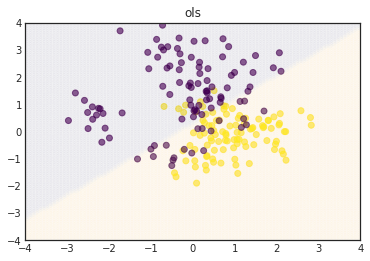

In [136]:
beta =ols(data[:,0:3],data[:,3])
y_pred =np.dot(np.concatenate([np.ones((len(X_test),1)),X_test,],axis=-1),beta)>0.5
print('y_pred shape ',y_pred.shape)
print('X_test[:,0] shape :',X_test[:,0].shape)
plt.xlim(-4,4)
plt.ylim(-4,4)
plt.style.use('seaborn-white')
plt.title('ols')
plt.scatter(data[:,1],data[:,2],c=data[:,3],alpha=0.6,cmap='viridis')
plt.scatter(X_test[:,0],X_test[:,1],c=y_pred,alpha=0.01,cmap='viridis')

y_pred shape  (10000,)
X_test[0] shape  (10000,)


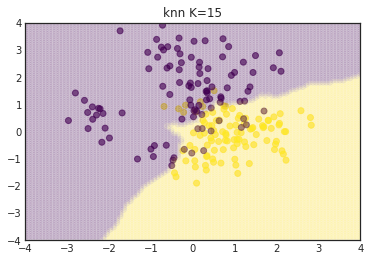

In [170]:
y_pred =k_nearest_neighbor(data[:,1:3],data[:,3],X_test,K=15)>0.5
y_pred =y_pred.reshape((10000,))
print('y_pred shape ',y_pred[:,].shape)
print('X_test[0] shape ',X_test[:,0].shape)
plt.xlim(-4,4)
plt.ylim(-4,4)
plt.style.use('seaborn-white')
plt.title('knn K=15')
plt.scatter(data[:,1],data[:,2],c=data[:,3],alpha=0.6,cmap='viridis')
plt.scatter(X_test[:,0],X_test[:,1],c=y_pred[:,],alpha=0.05,cmap='viridis')

y_pred shape  (10000,)
X_test[0] shape  (10000,)


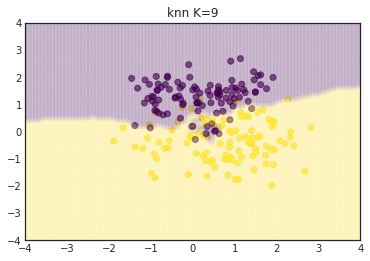

In [296]:
y_pred =k_nearest_neighbor(data[:,1:3],data[:,3],X_test,K=9)>=0.5
y_pred =y_pred.reshape((10000,))
print('y_pred shape ',y_pred[:,].shape)
print('X_test[0] shape ',X_test[:,0].shape)
plt.xlim(-4,4)
plt.ylim(-4,4)
plt.style.use('seaborn-white')
plt.title('knn K=9')
plt.scatter(data[:,1],data[:,2],c=data[:,3],alpha=0.6,cmap='viridis')
plt.scatter(X_test[:,0],X_test[:,1],c=y_pred[:,],alpha=0.05,cmap='viridis')

in bayes shape  (10000, 2)
y_pred shape  (10000,)
y_pred shape  (10000,)
X_test[0] shape  (10000,)
in bayes shape  (3, 2)
y_pred shape  (3,)
[1. 0. 0.]


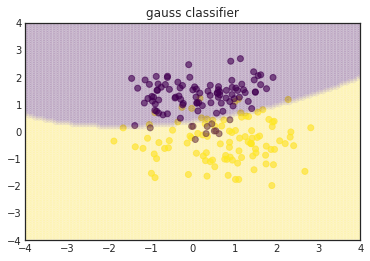

In [218]:
y_pred =bayes_classifier(data[:,1:3],data[:,3],X_test)
y_pred =y_pred.reshape((10000,))
print('y_pred shape ',y_pred[:,].shape)
print('X_test[0] shape ',X_test[:,0].shape)
plt.xlim(-4,4)
plt.ylim(-4,4)
plt.style.use('seaborn-white')
plt.title('gauss classifier')
plt.scatter(data[:,1],data[:,2],c=data[:,3],alpha=0.6,cmap='viridis')
plt.scatter(X_test[:,0],X_test[:,1],c=y_pred[:,],alpha=0.05,cmap='viridis')
print(bayes_classifier(data[:,1:3],data[:,3],np.array([[4,-4],[-4,4],[-3,3]],dtype='float')))

In [288]:
test_size =5000
X_test_data =np.ones((2*test_size,1),dtype='float')
X_test_data =np.concatenate([X_test_data,np.zeros((2*test_size,3))],axis=-1)
for i in range(size):
    X_test_data[i,1:3]=np.random.multivariate_normal(neg_means[np.random.randint(0,10)],data_conv,1)
    X_test_data[i,3]=0
    X_test_data[100+i,1:3]=np.random.multivariate_normal(pos_means[np.random.randint(0,10)],data_conv,1)
    X_test_data[i,3]=1

y_pred_test_ols =np.array(np.dot(X_test_data[:,0:3],beta)>0.5,dtype='float')
print('X_test_data[:,3] ',X_test_data[-20:-1,3])
print('y_pred_test ',y_pred_test_ols[-20:-1])
print('X_test_data shape ',X_test_data.shape)
y_pred_test_bayes =np.array(bayes_classifier(data[:,1:3],data[:,3],X_test_data[:,1:3])>0.5,dtype='float')

y_pred_test_bayes =y_pred_test_bayes.reshape((2*test_size,))
print('y_pred_test_bayes shape ',y_pred_test_bayes.shape)

print(np.sum(y_pred_test_ols!=X_test_data[:,3]))

error_test_ols =np.sum(y_pred_test_ols!=X_test_data[:,3])/len(X_test_data)
error_test_bayes =np.sum(y_pred_test_bayes!=X_test_data[:,3])/len(X_test_data)
print('ols test error ',error_test_ols)
print('bayes test error ',error_test_bayes)

X_test_data[:,3]  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
y_pred_test  [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
X_test_data shape  (10000, 4)
in bayes shape  (10000, 2)
y_pred shape  (10000,)
y_pred_test_bayes shape  (10000,)
9839
ols test error  0.9839
bayes test error  0.9817


y_pred shape  (10000, 1)
y_pred shape  (10000,)
X_test[0] shape  (10000,)


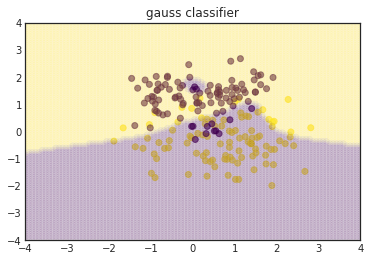

In [289]:
neg_means_1 =np.random.multivariate_normal(neg_mean,conv,10)
pos_means_1 =np.random.multivariate_normal(pos_mean,conv,10)
y_pred =bayes_classifier_model(neg_means_1,pos_means_1,data_conv,X_test)
y_pred =y_pred.reshape((10000,))
print('y_pred shape ',y_pred[:,].shape)
print('X_test[0] shape ',X_test[:,0].shape)
plt.xlim(-4,4)
plt.ylim(-4,4)
plt.style.use('seaborn-white')
plt.title('gauss classifier')
plt.scatter(data[:,1],data[:,2],c=data[:,3],alpha=0.6,cmap='viridis')
plt.scatter(X_test[:,0],X_test[:,1],c=y_pred[:,],alpha=0.05,cmap='viridis')

In [290]:
print(bayes_classifier_model(neg_means,pos_means,data_conv,[[4,-4],[-4,4],[-3,3],[1,0],[0,1]]))

y_pred shape  (5, 1)
[[0.]
 [1.]
 [1.]
 [0.]
 [1.]]


In [291]:
#import until



/root/anaconda3/envs/py36/lib/python3.6/site-packages/numpy/core/fromnumeric.py:3118: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/root/anaconda3/envs/py36/lib/python3.6/site-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


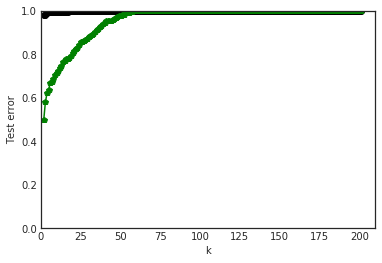

In [295]:
x_data =np.linspace(1,201,200)
#print(x_data.shape)
#x_data =(2*test_size)/x_data
#print(x_data)
x_data.reshape((200,1))

knn_test_erros =[]
knn_train_erros =[]
for i in range(200):
    temp =k_nearest_neighbor(data[:,1:3],data[:,3],X_test_data[:,1:3],K=i)
    #print('temp shape ',temp.shape)
    temp =np.array(temp)
    #print('temp shape ',temp.shape)
    #print('X_test_data[:,3] shape ',X_test_data[:,3].shape)
    #print(np.mean(np.array(temp!=X_test_data[:,3],dtype='float')))
    temp =(temp!=X_test_data[:,3]).mean()
    knn_test_erros.append(temp)
    
    temp1 =k_nearest_neighbor(data[:,1:3],data[:,3],data[:,1:3],K=i)
    temp1 =np.array(temp1)
    temp1 =(temp1!=data[:,3]).mean()
    #print('train error ',temp)
    #print('test error ',temp1)
    knn_train_erros.append(temp1)
    

plt.xlim(0,210)
plt.ylim(0,1)
plt.style.use('seaborn-white')
plt.xlabel("k")
plt.ylabel("Test error")
plt.plot(x_data[1:],knn_test_erros[1:],'-ok')
plt.plot(x_data[1:],knn_train_erros[1:],'-p',color='green')
